In [7]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Menampilkan info umum dataset
print(df.info())

# Menampilkan ringkasan statistik untuk kolom numerik
print(df.describe())

# Menampilkan beberapa baris pertama dari dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# 2. Pembersihan data (menghapus missing values dan duplikat)
df = df.drop_duplicates()  # Menghapus duplikat
df = df.dropna()  # Menghapus missing values

# Memeriksa kembali apakah masih ada missing values
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Mengonversi TotalCharges menjadi numerik, jika ada error (non-numeric), ganti dengan NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mengisi missing values pada TotalCharges dengan median (atau bisa juga menggunakan mean)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Normalisasi kolom numerik setelah perbaikan
scaler = MinMaxScaler()
df[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']])

# Tampilkan beberapa baris pertama untuk memastikan perubahan
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

# Encoding kolom kategorikal
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])  # Encode gender
df['Partner'] = encoder.fit_transform(df['Partner'])  # Encode Partner
df['Dependents'] = encoder.fit_transform(df['Dependents'])  # Encode Dependents
df['PhoneService'] = encoder.fit_transform(df['PhoneService'])  # Encode PhoneService
df['MultipleLines'] = encoder.fit_transform(df['MultipleLines'])  # Encode MultipleLines
df['InternetService'] = encoder.fit_transform(df['InternetService'])  # Encode InternetService
df['OnlineSecurity'] = encoder.fit_transform(df['OnlineSecurity'])  # Encode OnlineSecurity
df['OnlineBackup'] = encoder.fit_transform(df['OnlineBackup'])  # Encode OnlineBackup
df['DeviceProtection'] = encoder.fit_transform(df['DeviceProtection'])  # Encode DeviceProtection
df['TechSupport'] = encoder.fit_transform(df['TechSupport'])  # Encode TechSupport
df['StreamingTV'] = encoder.fit_transform(df['StreamingTV'])  # Encode StreamingTV
df['StreamingMovies'] = encoder.fit_transform(df['StreamingMovies'])  # Encode StreamingMovies
df['Contract'] = encoder.fit_transform(df['Contract'])  # Encode Contract
df['PaperlessBilling'] = encoder.fit_transform(df['PaperlessBilling'])  # Encode PaperlessBilling
df['PaymentMethod'] = encoder.fit_transform(df['PaymentMethod'])  # Encode PaymentMethod
df['Churn'] = encoder.fit_transform(df['Churn'])  # Encode Churn

     tenure  MonthlyCharges  TotalCharges
0  0.013889        0.115423      0.001275
1  0.472222        0.385075      0.215867
2  0.027778        0.354229      0.010310
3  0.625000        0.239303      0.210241
4  0.027778        0.521891      0.015330


C:\Users\andif\AppData\Local\Temp\ipykernel_30580\1861063172.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


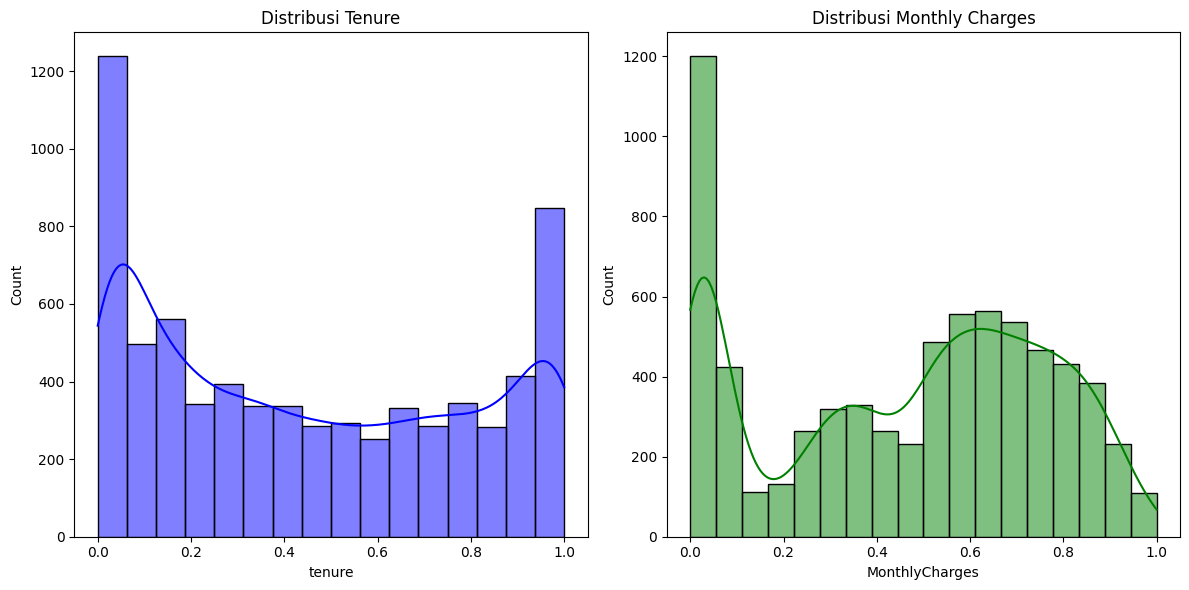

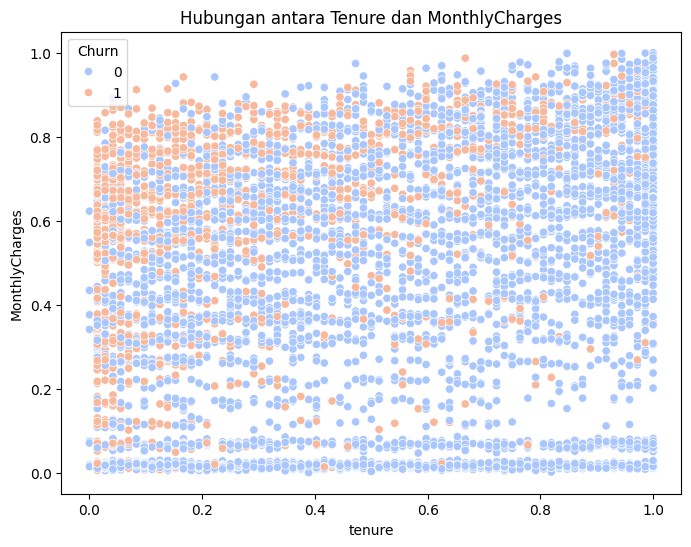

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi dari kolom 'tenure' dan 'MonthlyCharges'
plt.figure(figsize=(12, 6))

# Subplot 1: Distribusi 'tenure'
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], kde=True, color='blue')
plt.title('Distribusi Tenure')

# Subplot 2: Distribusi 'MonthlyCharges'
plt.subplot(1, 2, 2)
sns.histplot(df['MonthlyCharges'], kde=True, color='green')
plt.title('Distribusi Monthly Charges')

plt.tight_layout()
plt.show()

# Plot hubungan antara 'tenure' dan 'MonthlyCharges'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn', palette='coolwarm')
plt.title('Hubungan antara Tenure dan MonthlyCharges')
plt.show()


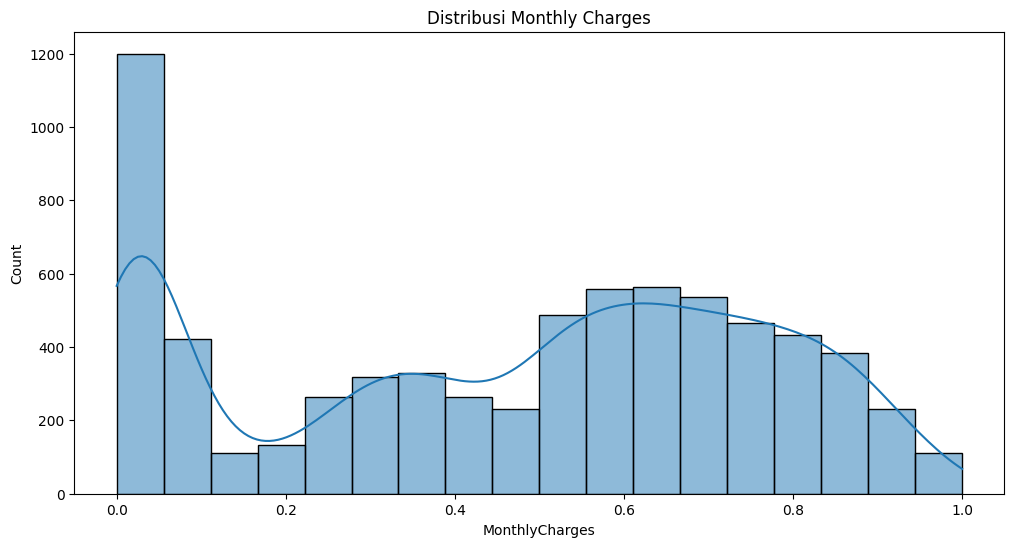

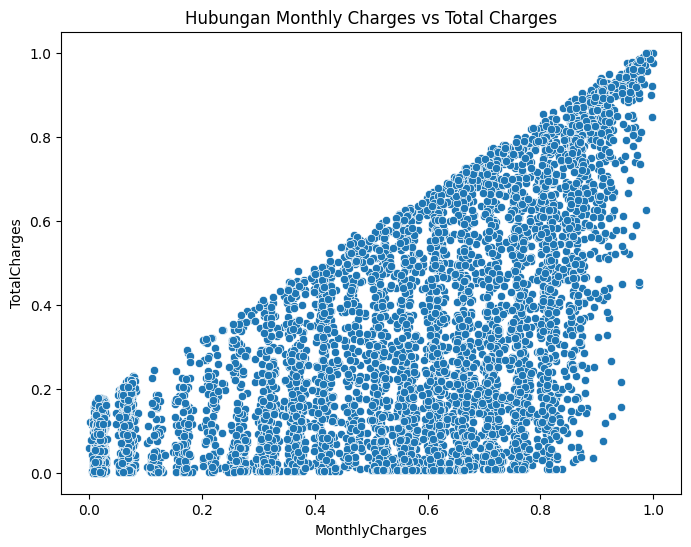

In [13]:
# 4. Plot distribusi dan hubungan antar variabel numerik
# Distribusi dari `MonthlyCharges` dan `TotalCharges`
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribusi Monthly Charges')
plt.show()

# Hubungan antara `MonthlyCharges` dan `TotalCharges`
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Hubungan Monthly Charges vs Total Charges')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1406  133]
 [ 292  282]]


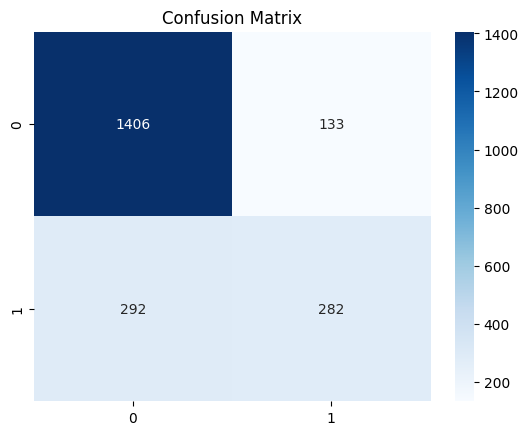

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Memisahkan fitur dan target
X = df.drop(['customerID', 'Churn'], axis=1)  # Fitur
y = df['Churn']  # Target

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model menggunakan Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Memprediksi hasil
y_pred = model.predict(X_test)

# Menilai kinerja model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()
